# Data Types, Graphical Marks, and Visual Encoding Channels

A visualization represents data using a collection of _graphical marks_ (bars, lines, points, etc.). The attributes of a mark &mdash; such as its position, shape, size, or color &mdash; serve as _channels_ through which we can encode underlying data values.

In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Global Development Data


In [2]:
from vega_datasets import data as vega_data
data = pd.read_json(vega_data.gapminder.url)

In [3]:
data.head(5)

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


In [5]:
data2000 = data[data.year==2000]

## Data Types
![](figures/data_types.jpeg)


The first ingredient in effective visualization is the input data. Data values can represent different forms of measurement. What kinds of comparisons do those measurements support? And what kinds of visual encodings then support those comparisons?

We will start by looking at the basic data types that Altair uses to inform visual encoding choices. These data types determine the kinds of comparisons we can make, and thereby guide our visualization design decisions.

### Nominal (N)

*Nominal* data (also called *categorical* data) consist of category names. 

With nominal data we can compare the equality of values: *is value A the same or different than value B? (A = B)*, supporting statements like “A is equal to B” or “A is not equal to B”.
In the dataset above, the `country` field is nominal.

When visualizing nominal data we should readily be able to see if values are the same or different: position, color hue (blue, red, green, *etc.*), and shape can help. However, using a size channel to encode nominal data might mislead us, suggesting rank-order or magnitude differences among values that do not exist!

### Ordinal (O)

*Ordinal* data consist of values that have a specific ordering.

With ordinal data we can compare the rank-ordering of values: *does value A come before or after value B? (A < B)*, supporting statements like “A is less than B” or “A is greater than B”.
In the dataset above, we can treat the `year` field as ordinal.

When visualizing ordinal data, we should perceive a sense of rank-order. Position, size, or color value (brightness) might be appropriate, where as color hue (which is not perceptually ordered) would be less appropriate.

### Quantitative (Q)

With *quantitative* data we can measure numerical differences among values. There are multiple sub-types of quantitative data:

For *interval* data we can measure the distance (interval) between points: *what is the distance to value A from value B? (A - B)*, supporting statements such as “A is 12 units away from B”.

For *ratio* data the zero-point is meaningful and so we can also measure proportions or scale factors: *value A is what proportion of value B? (A / B)*, supporting statements such as “A is 10% of B” or “B is 7 times larger than A”.

In the dataset above, `year` is a quantitative interval field (the value of year "zero" is subjective), whereas `fertility` and `life_expect` are quantitative ratio fields (zero is meaningful for calculating proportions).
Vega-Lite represents quantitative data, but does not make a distinction between interval and ratio types.

Quantitative values can be visualized using position, size, or color value, among other channels. An axis with a zero baseline is essential for proportional comparisons of ratio values, but can be safely omitted for interval comparisons.

### Temporal (T)

*Temporal* values measure time points or intervals. This type is a special case of quantitative values (timestamps) with rich semantics and conventions (i.e., the [Gregorian calendar](https://en.wikipedia.org/wiki/Gregorian_calendar)). The temporal type in Vega-Lite supports reasoning about time units (year, month, day, hour, etc.), and provides methods for requesting specific time intervals.

Example temporal values include date strings such as `“2019-01-04”` and `“Jan 04 2019”`, as well as standardized date-times such as the [ISO date-time format](https://en.wikipedia.org/wiki/ISO_8601): `“2019-01-04T17:50:35.643Z”`.

There are no temporal values in our global development dataset above, as the `year` field is simply encoded as an integer. For more details about using temporal data in Altair, see the [Times and Dates documentation](https://altair-viz.github.io/user_guide/times_and_dates.html).

### Summary

These data types are not mutually exclusive, but rather form a hierarchy: ordinal data support nominal (equality) comparisons, while quantitative data support ordinal (rank-order) comparisons.

Moreover, these data types do _not_ provide a fixed categorization. Just because a data field is represented using a number doesn't mean we have to treat it as a quantitative type! For example, we might interpret a set of ages (10 years old, 20 years old, etc) as nominal (underage or overage), ordinal (grouped by year), or quantitative (calculate average age).

Now let's examine how to visually encode these data types!


## Encoding Channels

At the heart of Altair is the use of *encodings* that bind data fields (with a given data type) to available encoding *channels* of a chosen *mark* type. In this notebook we'll examine the following encoding channels:

- `x`: Horizontal (x-axis) position of the mark.
- `y`: Vertical (y-axis) position of the mark.
- `size`: Size of the mark. May correspond to area or length, depending on the mark type.
- `color`: Mark color, specified as a [legal CSS color](https://developer.mozilla.org/en-US/docs/Web/CSS/color_value).
- `opacity`: Mark opacity, ranging from 0 (fully transparent) to 1 (fully opaque).
- `shape`: Plotting symbol shape for `point` marks.
- `tooltip`: Tooltip text to display upon mouse hover over the mark.
- `order`: Mark ordering, determines line/area point order and drawing order.
- `column`: Facet the data into horizontally-aligned subplots.
- `row`: Facet the data into vertically-aligned subplots.

For a complete list of available channels, see the [Altair encoding documentation](https://altair-viz.github.io/user_guide/encoding.html).

### X

The `x` encoding channel sets a mark's horizontal position (x-coordinate). In addition, default choices of axis and title are made automatically. In the chart below, the choice of a quantitative data type results in a continuous linear axis scale:

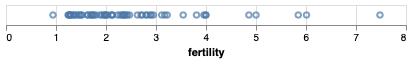

In [6]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q')
)

### Y

The `y` encoding channel sets a mark's vertical position (y-coordinate). Here we've added the `cluster` field using an ordinal (`O`) data type. The result is a discrete axis that includes a sized band, with a default step size, for each unique value:

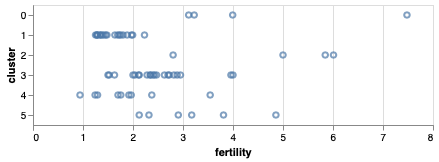

In [12]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:O')
)

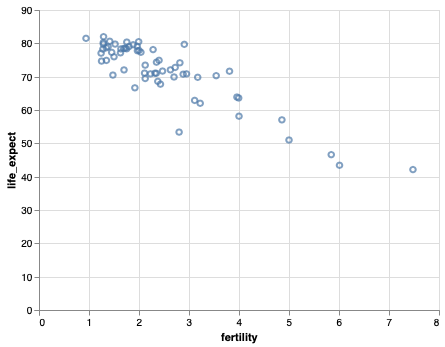

In [13]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q')
)

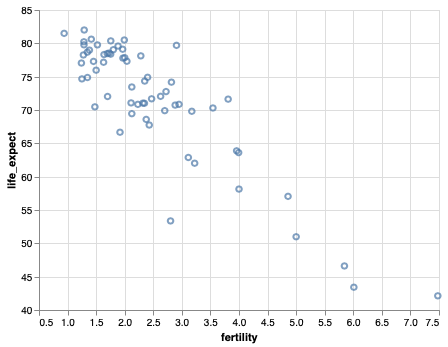

In [16]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False)),
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False))
)

### Size

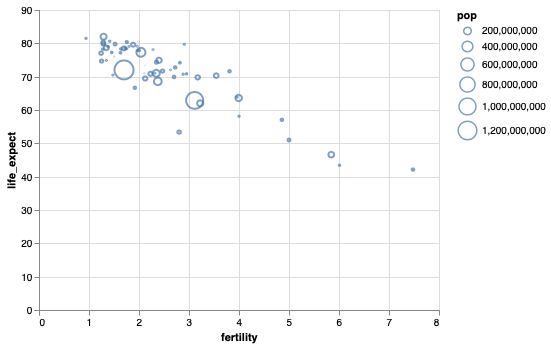

In [18]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q')
)

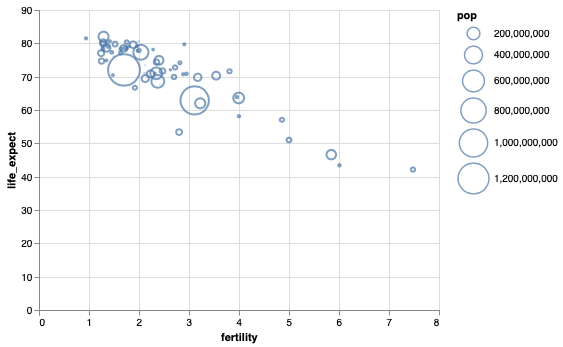

In [19]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]))
)

### Color and Opacity

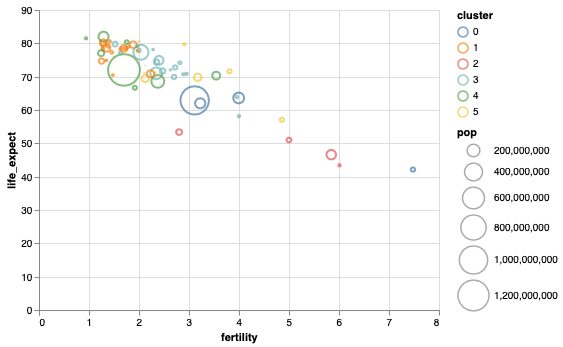

In [20]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N')
)

If we prefer filled shapes, we can can pass a `filled=True` parameter to the `mark_point` method:

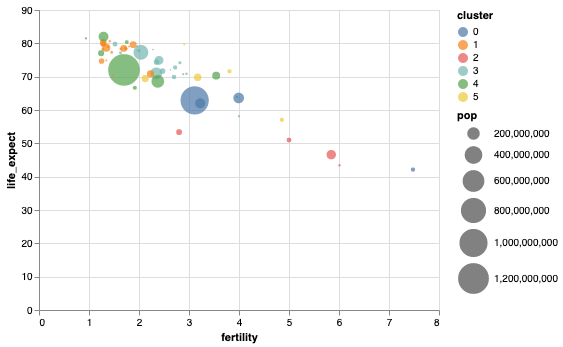

In [14]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N')
)

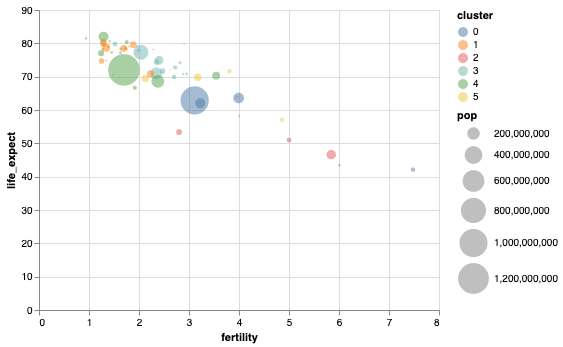

In [15]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5)
)

### Shape

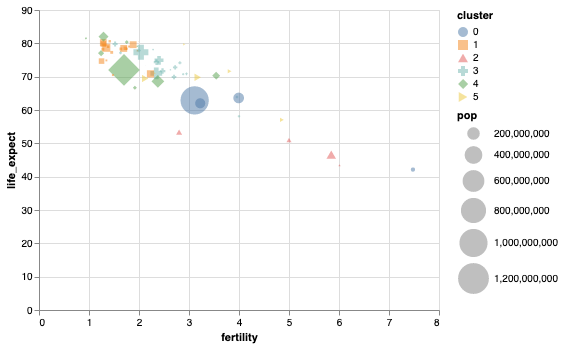

In [16]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Shape('cluster:N')
)

### Tooltips & Ordering

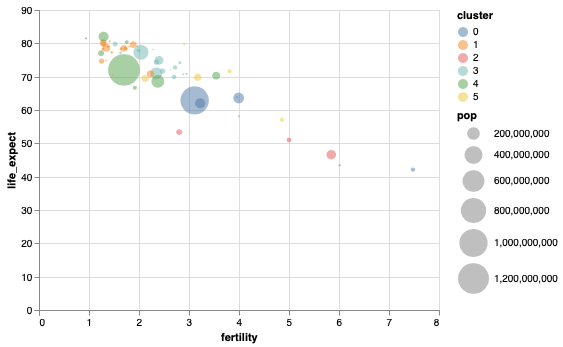

In [21]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country')
)

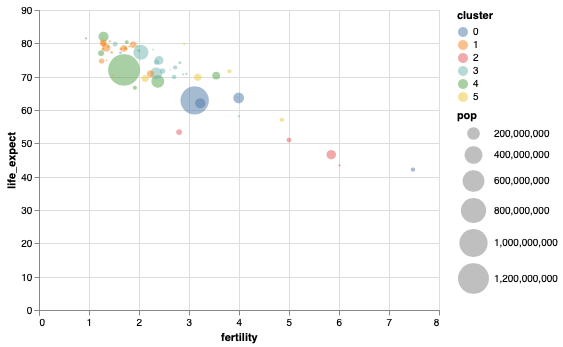

In [22]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending')
)

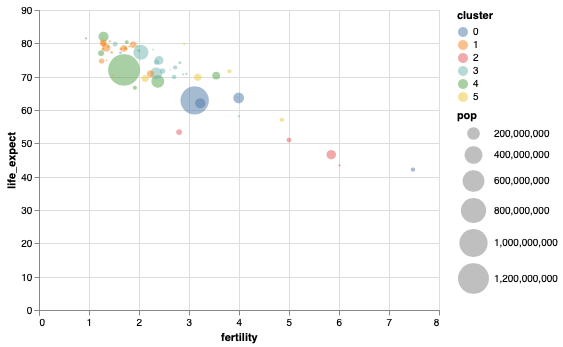

In [23]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Order('pop:Q', sort='descending'),
    tooltip = [
        alt.Tooltip('country:N'),
        alt.Tooltip('fertility:Q'),
        alt.Tooltip('life_expect:Q')
    ]   
)

### Column and Row Facets

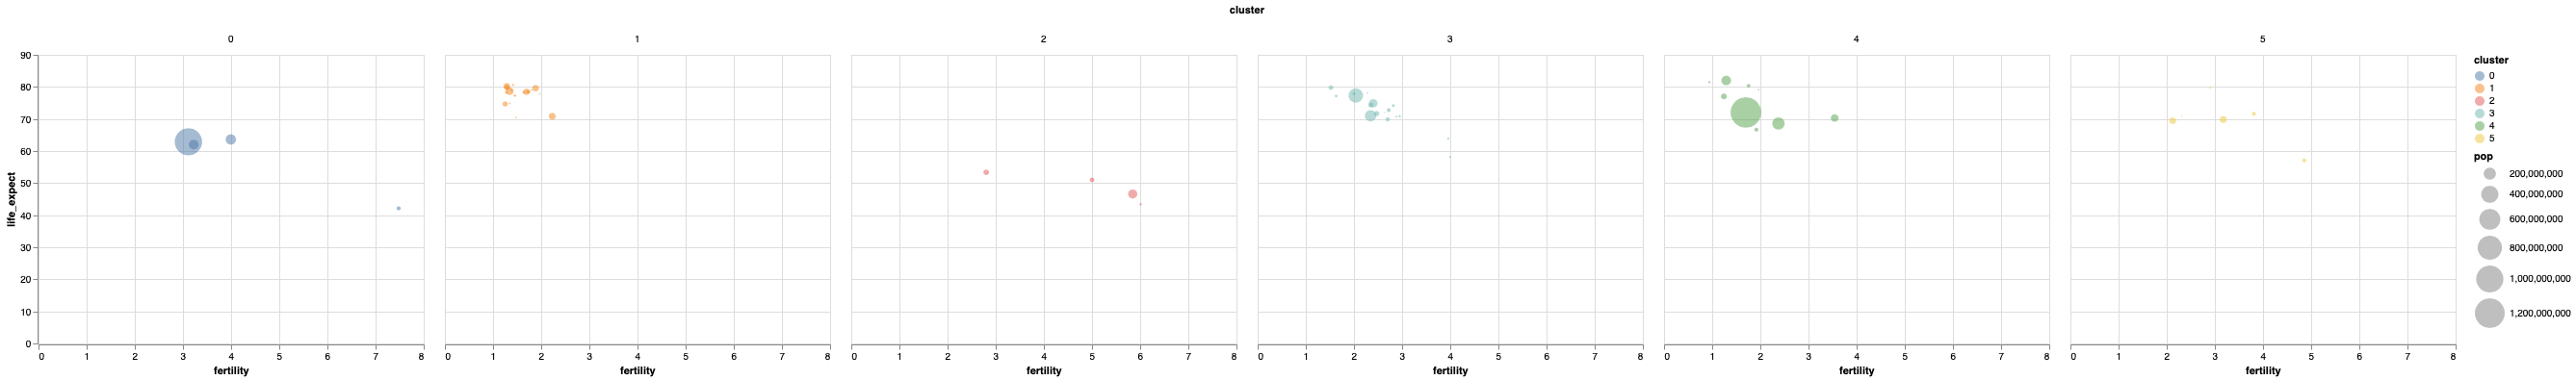

In [24]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Column('cluster:N')
)

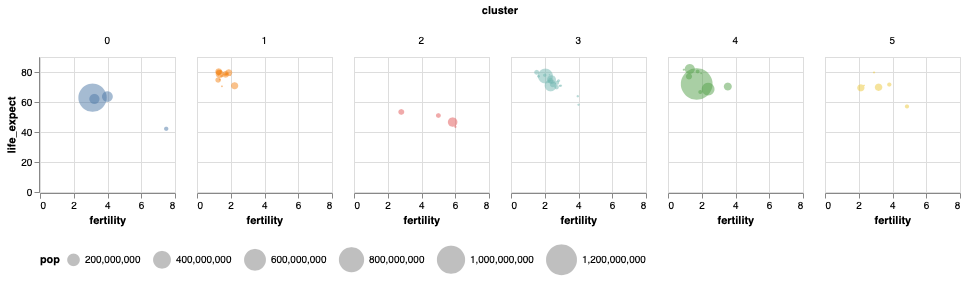

In [25]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]),
             legend=alt.Legend(orient='bottom', titleOrient='left')),
    alt.Color('cluster:N', legend=None),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Column('cluster:N')
).properties(width=135, height=135)

## Graphical Marks

Our exploration of encoding channels above exclusively uses `point` marks to visualize the data. However, the `point` mark type is only one of the many geometric shapes that can be used to visually represent data. Altair includes a number of built-in mark types, including:

- `mark_area()` - Filled areas defined by a top-line and a baseline.
- `mark_bar()` -	Rectangular bars.
- `mark_circle()`	- Scatter plot points as filled circles.
- `mark_line()` - Connected line segments.
- `mark_point()` - Scatter plot points with configurable shapes.
- `mark_rect()` - Filled rectangles, useful for heatmaps.
- `mark_rule()` - Vertical or horizontal lines spanning the axis.
- `mark_square()` - Scatter plot points as filled squares.
- `mark_text()` - Scatter plot points represented by text.
- `mark_tick()` - Vertical or horizontal tick marks.	

For a complete list, and links to examples, see the [Altair marks documentation](https://altair-viz.github.io/user_guide/marks.html). Next, we will step through a number of the most commonly used mark types for statistical graphics.

### Point Marks

The `point` mark type conveys specific points, as in *scatter plots* and *dot plots*. In addition to `x` and `y` encoding channels (to specify 2D point positions), point marks can use `color`, `size`, and `shape` encodings to convey additional data fields.

Below is a dot plot of `fertility`, with the `cluster` field redundantly encoded using both the `y` and `shape` channels. 



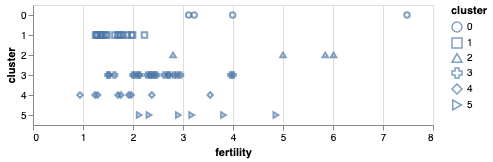

In [23]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

In addition to encoding channels, marks can be stylized by providing values to the `mark_*()` methods.

For example: point marks are drawn with stroked outlines by default, but can be specified to use `filled` shapes instead. Similarly, you can set a default `size` to set the total pixel area of the point mark.


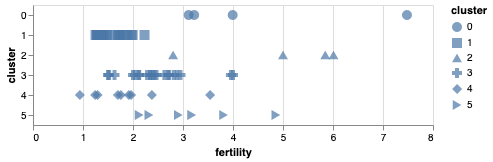

In [24]:
alt.Chart(data2000).mark_point(filled=True, size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

### Circle Marks

The `circle` mark type is a convenient shorthand for `point` marks drawn as filled circles.

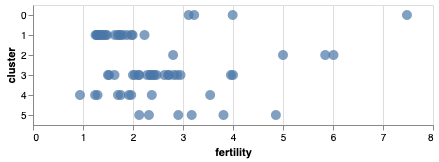

In [25]:
alt.Chart(data2000).mark_circle(size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

### Square Marks

The `square` mark type is a convenient shorthand for `point` marks drawn as filled squares.

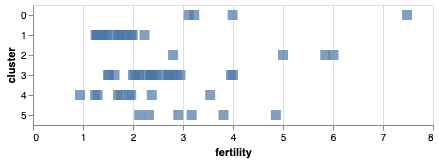

In [26]:
alt.Chart(data2000).mark_square(size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

### Tick Marks

The `tick` mark type conveys a data point using a short line segment or "tick". These are particularly useful for comparing values along a single dimension with minimal overlap. A *dot plot* drawn with tick marks is sometimes referred to as a *strip plot*.

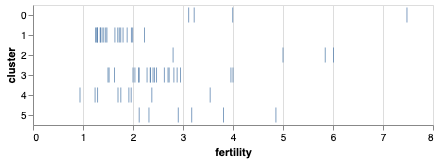

In [27]:
alt.Chart(data2000).mark_tick().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

### Bar Marks

The \`bar\` mark type draws a rectangle with a position, width, and height.

The plot below is a simple bar chart of the population (\`pop\`) of each country.

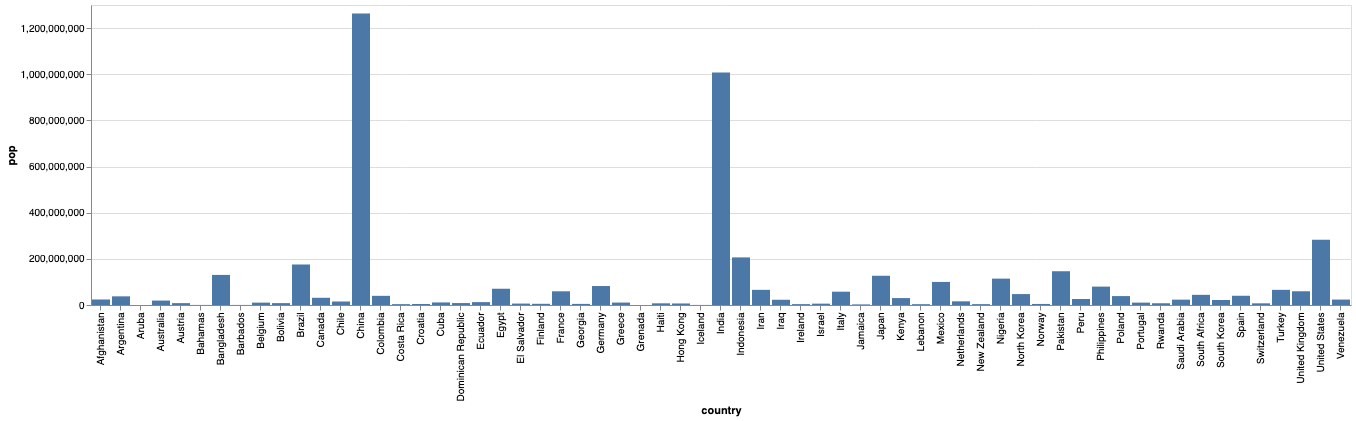

In [28]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('country:N'),
    alt.Y('pop:Q')
)

The bar width is set to a default size. To change the width, _try setting the \`rangeStep\` property of the \`x\` channel's \`scale\` attribute_. (In a later module we will take a closer look at configuring axes, scales, and legends.)

Bars can also be stacked. Let's change the `x` encoding to use the `cluster` field, and encode `country` using the `color` channel. We'll also disable the legend (which would be very long with colors for all countries!) and use tooltips for the country name.

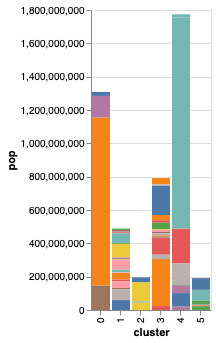

In [29]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('cluster:N'),
    alt.Y('pop:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
)

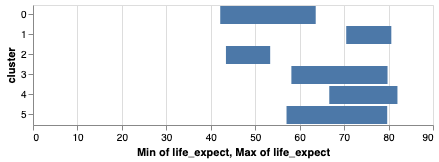

In [30]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('min(life_expect):Q'),
    alt.X2('max(life_expect):Q'),
    alt.Y('cluster:N')
)

### Line Marks

The `line` mark type connects plotted points with line segments, for example so that a line's slope conveys information about the rate of change.

Let's plot a line chart of fertility per country over the years, using the full, unfiltered global development data frame. We'll again hide the legend and use tooltips instead.


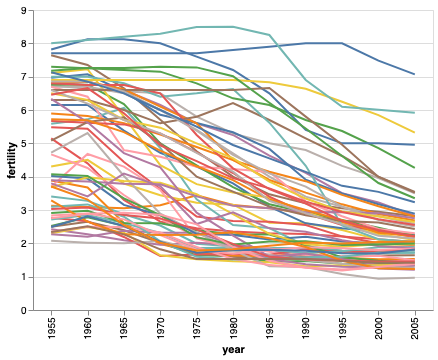

In [31]:
alt.Chart(data).mark_line().encode(
    alt.X('year:O'),
    alt.Y('fertility:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width=400
)

We can see interesting variations per country, but overall trends for lower numbers of children per family over time. Also note that we set a custom width of 400 pixels. _Try changing (or removing) the widths and see what happens!_

Let's change some of the default mark parameters to customize the plot. We can set the `strokeWidth` to determine the thickness of the lines and the `opacity` to add some transparency. By default, the `line` mark uses straight line segments to connect data points. In some cases we might want to smooth the lines. We can adjust the interpolation used to connect data points by setting the `interpolate` mark parameter. Let's use `'monotone'` interpolation to provide smooth lines that are also guaranteed not to inadvertently generate "false" minimum or maximum values as a result of the interpolation.

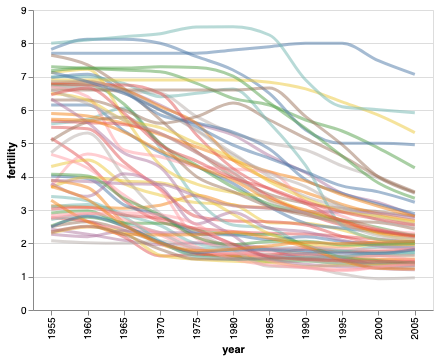

In [32]:
alt.Chart(data).mark_line(
    strokeWidth=3,
    opacity=0.5,
    interpolate='monotone'
).encode(
    alt.X('year:O'),
    alt.Y('fertility:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width=400
)

The `line` mark can also be used to create *slope graphs*, charts that highlight the change in value between two comparison points using line slopes.

Below let's create a slope graph comparing the populations of each country at minimum and maximum years in our full dataset: 1955 and 2005. We first create a new Pandas data frame filtered to those years, then use Altair to create the slope graph.

By default, Altair places the years close together. To better space out the years along the x-axis, we can use the `scale` parameter's `rangeStep` property to indicate the size (in pixels) of discrete steps along the x-axis range. Try adjusting the `rangeStep` below and see how the chart changes in response.

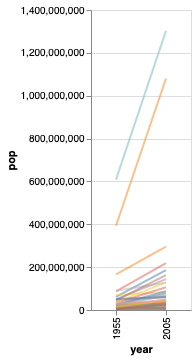

In [33]:
dataTime = data.loc[(data['year'] == 1955) | (data['year'] == 2005)]

alt.Chart(dataTime).mark_line(opacity=0.5).encode(
    alt.X('year:O', scale=alt.Scale(rangeStep=50)),
    alt.Y('pop:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
)

### Area Marks

The `area` mark type combines aspects of `line` and `bar` marks: it visualizes connections (slopes) among data points, but also shows a filled region, with one edge defaulting to a zero-valued baseline.

The chart below is an area chart of population over time for just the United States:

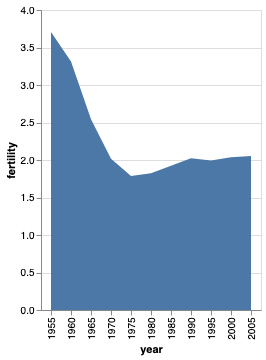

In [34]:
dataUS = data.loc[data['country'] == 'United States']

alt.Chart(dataUS).mark_area().encode(
    alt.X('year:O'),
    alt.Y('fertility:Q')
)

Similar to `line` marks, `area` marks support an `interpolate` parameter.

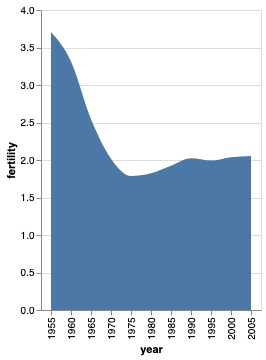

In [35]:
alt.Chart(dataUS).mark_area(interpolate='monotone').encode(
    alt.X('year:O'),
    alt.Y('fertility:Q')
)

Similar to `bar` marks, `area` marks also support stacking. Here we create a new data frame with data for the three North American countries, then plot them using an `area` mark and a `color` encoding channel to stack by country.

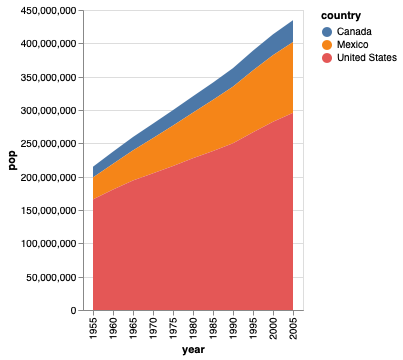

In [29]:
dataNA = data.loc[
    (data['country'] == 'United States') |
    (data['country'] == 'Canada') |
    (data['country'] == 'Mexico')
]

alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q'),
    alt.Color('country:N')
)

By default, stacking is performed relative to a zero baseline. However, other `stack` options are available:

* `center` - to stack relative to a baseline in the center of the chart, creating a *streamgraph* visualization, and
* `normalize` - to normalize the summed data at each stacking point to 100%, enabling percentage comparisons.

Below we adapt the chart by setting the `y` encoding `stack` attribute to `center`. What happens if you instead set it `normalize`?

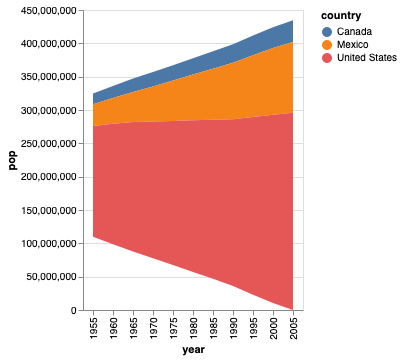

In [37]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack='center'),
    alt.Color('country:N')
)

To disable stacking altogether, set the  `stack` attribute to `None`. We can also add `opacity` as a default mark parameter to ensure we see the overlapping areas!

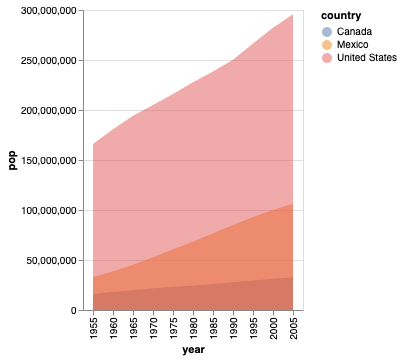

In [38]:
alt.Chart(dataNA).mark_area(opacity=0.5).encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack=None),
    alt.Color('country:N')
)

The `area` mark type also supports data-driven baselines, with both the upper and lower series determined by data fields. As with `bar` marks, we can use the `x` and `x2` (or `y` and `y2`) channels to provide end points for the area mark.

The chart below visualizes the range of minimum and maximum fertility, per year, for North American countries:

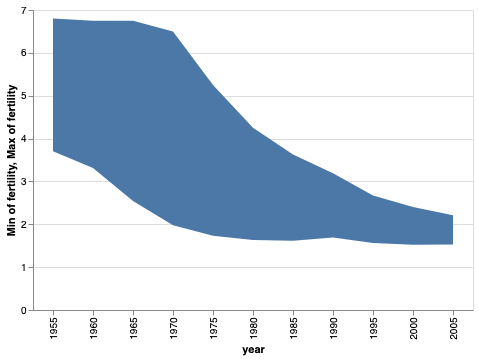

In [39]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O', scale=alt.Scale(rangeStep=40)),
    alt.Y('min(fertility):Q'),
    alt.Y2('max(fertility):Q')
)

We can see a larger range of values in 1995, from just under 4 to just under 7. By 2005, both the overall fertility values and the variability have declined, centered around 2 children per familty.

All the `area` mark examples above use a vertically oriented area. However, Altair and Vega-Lite support horizontal areas as well. Let's transpose the chart above, simply by swapping the `x` and `y` channels.

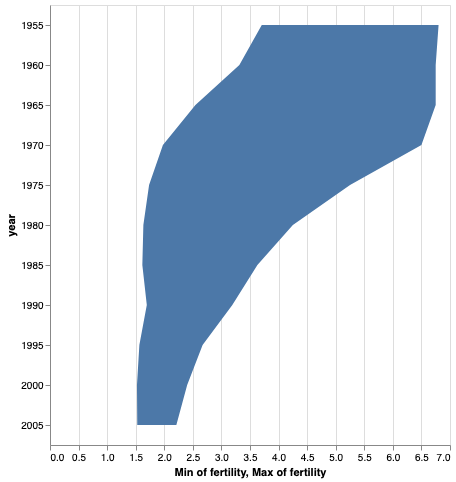

In [40]:
alt.Chart(dataNA).mark_area().encode(
    alt.Y('year:O', scale=alt.Scale(rangeStep=40)),
    alt.X('min(fertility):Q'),
    alt.X2('max(fertility):Q')
)